In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import sklearn as sklearn
from bs4 import BeautifulSoup
from matplotlib import style
import datetime as dt
import yfinance as yf
%matplotlib inline
import matplotlib.dates as mdates 
import mplfinance as mpf
from mpl_finance import candlestick_ohlc
import pickle
import requests

import bs4 as bs 
import requests
import pickle
import datetime as dt
import os
import pandas as pd
import pandas_datareader.data as web
import lxml
import yfinance as yf


import bs4 as bs 
import requests
import pickle
import lxml

In [51]:
style.use('ggplot')

In [52]:
start= dt.datetime(2000,1,1)
end=dt.datetime(2016,12,31)

In [39]:
!pip install fix-yahoo-finance==0.1.30


  Created wheel for fix-yahoo-finance: filename=fix_yahoo_finance-0.1.30-py3-none-any.whl size=12153 sha256=63ae44b04441c6555a66b1a363f31d4bf2dc39b63823a60cbfbbc03062223fbc
  Stored in directory: c:\users\aheed\appdata\local\pip\cache\wheels\92\e1\3e\740f2819c3bd57cb66d4f1036ee4f19df661ebb37e867ccaa2
Successfully built fix-yahoo-finance


In [81]:
df = yf.Ticker("TLSA").history(period='5y')

In [87]:
print(df.head(6))

                               Open      High       Low     Close  Volume  \
Date                                                                        
2018-11-20 00:00:00-05:00  2.100840  2.100840  1.670668  1.670668   87465   
2018-11-21 00:00:00-05:00  1.838735  2.434974  1.838735  2.118848   38984   
2018-11-23 00:00:00-05:00  2.200880  2.200880  1.958784  1.960784   14994   
2018-11-26 00:00:00-05:00  1.940776  1.940776  1.552621  1.676671   24990   
2018-11-27 00:00:00-05:00  1.760704  1.800720  1.700680  1.792717   21991   
2018-11-28 00:00:00-05:00  1.868747  1.870748  1.794718  1.794718   14494   

                           Dividends  Stock Splits  
Date                                                
2018-11-20 00:00:00-05:00          0           0.0  
2018-11-21 00:00:00-05:00          0           0.0  
2018-11-23 00:00:00-05:00          0           0.0  
2018-11-26 00:00:00-05:00          0           0.0  
2018-11-27 00:00:00-05:00          0           0.0  
2018-11-28 0

In [83]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1035 entries, 2018-11-20 00:00:00-05:00 to 2022-12-30 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1035 non-null   float64
 1   High          1035 non-null   float64
 2   Low           1035 non-null   float64
 3   Close         1035 non-null   float64
 4   Volume        1035 non-null   int64  
 5   Dividends     1035 non-null   int64  
 6   Stock Splits  1035 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 64.7 KB
None


In [73]:
!pip install quandl

In [76]:
import quandl
# Get data via Quandl API
data = quandl.get('WIKI/NVDA')
# Summarize
print(data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4825 entries, 1999-01-22 to 2018-03-27
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Open         4825 non-null   float64
 1   High         4825 non-null   float64
 2   Low          4825 non-null   float64
 3   Close        4825 non-null   float64
 4   Volume       4825 non-null   float64
 5   Ex-Dividend  4825 non-null   float64
 6   Split Ratio  4825 non-null   float64
 7   Adj. Open    4825 non-null   float64
 8   Adj. High    4825 non-null   float64
 9   Adj. Low     4825 non-null   float64
 10  Adj. Close   4825 non-null   float64
 11  Adj. Volume  4825 non-null   float64
dtypes: float64(12)
memory usage: 490.0 KB
None


In [85]:
bottom_five = df[-5:]
print(bottom_five)
#use df.tail(n)for n number from bottom

                           Open  High   Low  Close  Volume  Dividends  \
Date                                                                    
2022-12-23 00:00:00-05:00  0.61  0.61  0.58   0.60   53100          0   
2022-12-27 00:00:00-05:00  0.57  0.60  0.54   0.56  130400          0   
2022-12-28 00:00:00-05:00  0.61  0.61  0.53   0.57   73500          0   
2022-12-29 00:00:00-05:00  0.54  0.58  0.54   0.57   69000          0   
2022-12-30 00:00:00-05:00  0.55  0.61  0.54   0.60   48900          0   

                           Stock Splits  
Date                                     
2022-12-23 00:00:00-05:00           0.0  
2022-12-27 00:00:00-05:00           0.0  
2022-12-28 00:00:00-05:00           0.0  
2022-12-29 00:00:00-05:00           0.0  
2022-12-30 00:00:00-05:00           0.0  


In [86]:
df.tail(6)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-12-22 00:00:00-05:00,0.60,0.62,0.58,0.60,25800,0,0.0
2022-12-23 00:00:00-05:00,0.61,0.61,0.58,0.60,53100,0,0.0
2022-12-27 00:00:00-05:00,0.57,0.60,0.54,0.56,130400,0,0.0
2022-12-28 00:00:00-05:00,0.61,0.61,0.53,0.57,73500,0,0.0
2022-12-29 00:00:00-05:00,0.54,0.58,0.54,0.57,69000,0,0.0
2022-12-30 00:00:00-05:00,0.55,0.61,0.54,0.60,48900,0,0.0


In [88]:
df1 = yf.Ticker("AAPL").history(period='5y')
print(df1.tail(6))

                                 Open        High         Low       Close  \
Date                                                                        
2022-12-22 00:00:00-05:00  134.350006  134.559998  130.300003  132.229996   
2022-12-23 00:00:00-05:00  130.919998  132.419998  129.639999  131.860001   
2022-12-27 00:00:00-05:00  131.380005  131.410004  128.720001  130.029999   
2022-12-28 00:00:00-05:00  129.669998  131.029999  125.870003  126.040001   
2022-12-29 00:00:00-05:00  127.989998  130.479996  127.730003  129.610001   
2022-12-30 00:00:00-05:00  128.410004  129.949997  127.430000  129.929993   

                             Volume  Dividends  Stock Splits  
Date                                                          
2022-12-22 00:00:00-05:00  77852100        0.0           0.0  
2022-12-23 00:00:00-05:00  63814900        0.0           0.0  
2022-12-27 00:00:00-05:00  69007800        0.0           0.0  
2022-12-28 00:00:00-05:00  85438400        0.0           0.0  
2022-

In [89]:
df1.head(4)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-01-02 00:00:00-05:00,40.451276,40.960008,40.237322,40.950497,102223600,0.0,0.0
2018-01-03 00:00:00-05:00,41.014678,41.494883,40.879176,40.943359,118071600,0.0,0.0
2018-01-04 00:00:00-05:00,41.017051,41.238137,40.907699,41.133537,89738400,0.0,0.0
2018-01-05 00:00:00-05:00,41.231006,41.689813,41.138293,41.601856,94640000,0.0,0.0


In [101]:
df.to_csv('fin.csv')

In [102]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-11-20 00:00:00-05:00,2.100840,2.100840,1.670668,1.670668,87465,0,0.0
2018-11-21 00:00:00-05:00,1.838735,2.434974,1.838735,2.118848,38984,0,0.0
2018-11-23 00:00:00-05:00,2.200880,2.200880,1.958784,1.960784,14994,0,0.0
2018-11-26 00:00:00-05:00,1.940776,1.940776,1.552621,1.676671,24990,0,0.0
2018-11-27 00:00:00-05:00,1.760704,1.800720,1.700680,1.792717,21991,0,0.0


In [104]:
data= pd.read_csv('fin.csv',parse_dates=True,index_col=0)
print (data.head())

                               Open      High       Low     Close  Volume  \
Date                                                                        
2018-11-20 00:00:00-05:00  2.100840  2.100840  1.670668  1.670668   87465   
2018-11-21 00:00:00-05:00  1.838735  2.434974  1.838735  2.118848   38984   
2018-11-23 00:00:00-05:00  2.200880  2.200880  1.958784  1.960784   14994   
2018-11-26 00:00:00-05:00  1.940776  1.940776  1.552621  1.676671   24990   
2018-11-27 00:00:00-05:00  1.760704  1.800720  1.700680  1.792717   21991   

                           Dividends  Stock Splits  
Date                                                
2018-11-20 00:00:00-05:00          0           0.0  
2018-11-21 00:00:00-05:00          0           0.0  
2018-11-23 00:00:00-05:00          0           0.0  
2018-11-26 00:00:00-05:00          0           0.0  
2018-11-27 00:00:00-05:00          0           0.0  


<AxesSubplot:xlabel='Date'>

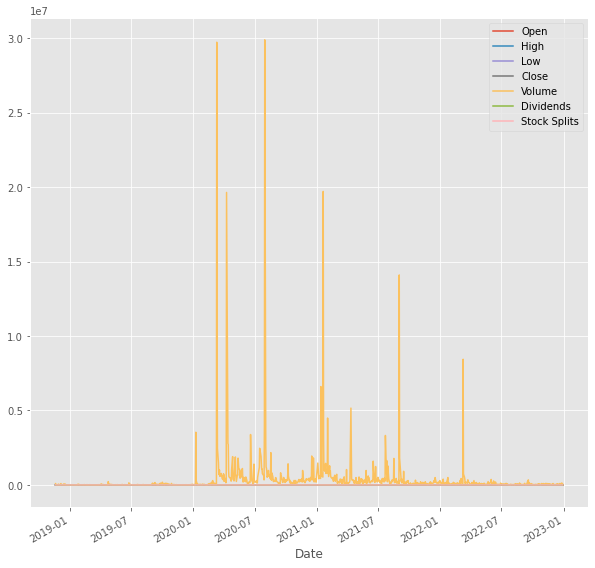

In [124]:
df.plot(figsize=(10,10))

<AxesSubplot:xlabel='Date'>

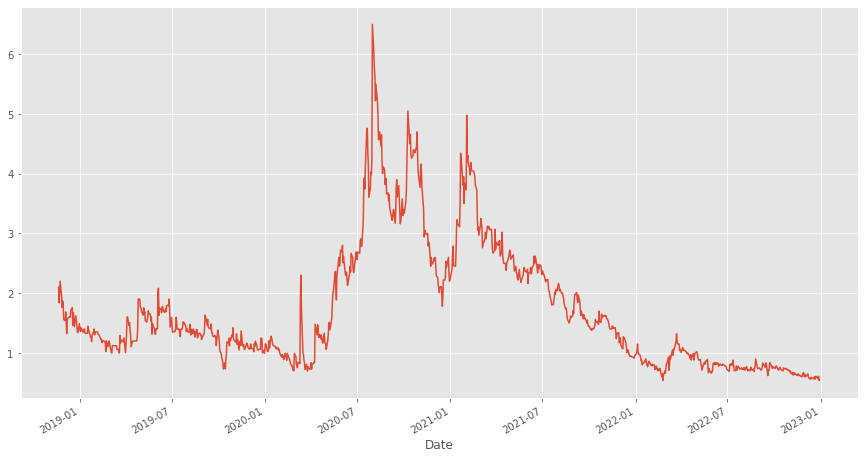

In [116]:
df['Open'].plot(figsize=(15,8))

In [118]:
print(df['Open'].head())

Date
2018-11-20 00:00:00-05:00    2.100840
2018-11-21 00:00:00-05:00    1.838735
2018-11-23 00:00:00-05:00    2.200880
2018-11-26 00:00:00-05:00    1.940776
2018-11-27 00:00:00-05:00    1.760704
Name: Open, dtype: float64


In [119]:
print(df['Open'].tail())

Date
2022-12-23 00:00:00-05:00    0.61
2022-12-27 00:00:00-05:00    0.57
2022-12-28 00:00:00-05:00    0.61
2022-12-29 00:00:00-05:00    0.54
2022-12-30 00:00:00-05:00    0.55
Name: Open, dtype: float64


In [122]:
a=(df[['Open','High']].head())
print (a)

                               Open      High
Date                                         
2018-11-20 00:00:00-05:00  2.100840  2.100840
2018-11-21 00:00:00-05:00  1.838735  2.434974
2018-11-23 00:00:00-05:00  2.200880  2.200880
2018-11-26 00:00:00-05:00  1.940776  1.940776
2018-11-27 00:00:00-05:00  1.760704  1.800720


In [126]:
df['Close']

Date
2018-11-20 00:00:00-05:00    1.670668
2018-11-21 00:00:00-05:00    2.118848
2018-11-23 00:00:00-05:00    1.960784
2018-11-26 00:00:00-05:00    1.676671
2018-11-27 00:00:00-05:00    1.792717
                               ...   
2022-12-23 00:00:00-05:00    0.600000
2022-12-27 00:00:00-05:00    0.560000
2022-12-28 00:00:00-05:00    0.570000
2022-12-29 00:00:00-05:00    0.570000
2022-12-30 00:00:00-05:00    0.600000
Name: Close, Length: 1035, dtype: float64

In [132]:
df['100ma']=df['Close'].rolling(window=100,min_periods=0).mean()

In [133]:
print(df.head())

                              Open     High      Low    Close  Volume  \
Date                                                                    
2019-04-16 00:00:00-04:00  1.20048  1.20048  1.20048  1.20048    1499   
2019-04-17 00:00:00-04:00  1.20048  1.20048  1.20048  1.20048    2499   
2019-04-18 00:00:00-04:00  1.20048  1.20048  1.20048  1.20048     500   
2019-04-22 00:00:00-04:00  1.20048  1.20048  1.20048  1.20048    1000   
2019-04-23 00:00:00-04:00  1.20048  1.20048  1.20048  1.20048     500   

                           Dividends  Stock Splits    100ma  
Date                                                         
2019-04-16 00:00:00-04:00          0           0.0  1.20048  
2019-04-17 00:00:00-04:00          0           0.0  1.20048  
2019-04-18 00:00:00-04:00          0           0.0  1.20048  
2019-04-22 00:00:00-04:00          0           0.0  1.20048  
2019-04-23 00:00:00-04:00          0           0.0  1.20048  


In [134]:
print(df.tail())

                           Open  High   Low  Close  Volume  Dividends  \
Date                                                                    
2022-12-23 00:00:00-05:00  0.61  0.61  0.58   0.60   53100          0   
2022-12-27 00:00:00-05:00  0.57  0.60  0.54   0.56  130400          0   
2022-12-28 00:00:00-05:00  0.61  0.61  0.53   0.57   73500          0   
2022-12-29 00:00:00-05:00  0.54  0.58  0.54   0.57   69000          0   
2022-12-30 00:00:00-05:00  0.55  0.61  0.54   0.60   48900          0   

                           Stock Splits   100ma  
Date                                             
2022-12-23 00:00:00-05:00           0.0  0.7019  
2022-12-27 00:00:00-05:00           0.0  0.6997  
2022-12-28 00:00:00-05:00           0.0  0.6978  
2022-12-29 00:00:00-05:00           0.0  0.6962  
2022-12-30 00:00:00-05:00           0.0  0.6949  


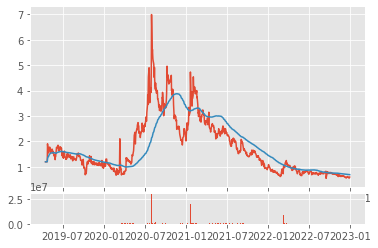

In [139]:
ax1= plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax2= plt.subplot2grid((6,1),(5,0),rowspan=1,colspan=1,sharex=ax1)
ax1.plot(df.index,df['Close'])
ax1.plot(df.index,df['100ma'])
ax2.bar(df.index,df['Volume'])
plt.show()

In [150]:
!pip install mpl_finance

In [154]:
from mpl_finance import candlestick_ohlc

In [162]:
#resampling data

df_ohlc= df['100ma'].resample('10D').ohlc()
df_volume= df['Volume'].resample('10D').sum()
df_ohlc.reset_index(inplace=True)
df_ohlc= df_ohlc['Date'].map(mdates.date2num)
print(df_ohlc)

0      18002.166667
1      18012.166667
2      18022.166667
3      18032.166667
4      18042.166667
           ...     
131    19312.208333
132    19322.208333
133    19332.208333
134    19342.208333
135    19352.208333
Name: Date, Length: 136, dtype: float64


In [163]:
print(df.head())

                              Open     High      Low    Close  Volume  \
Date                                                                    
2019-04-16 00:00:00-04:00  1.20048  1.20048  1.20048  1.20048    1499   
2019-04-17 00:00:00-04:00  1.20048  1.20048  1.20048  1.20048    2499   
2019-04-18 00:00:00-04:00  1.20048  1.20048  1.20048  1.20048     500   
2019-04-22 00:00:00-04:00  1.20048  1.20048  1.20048  1.20048    1000   
2019-04-23 00:00:00-04:00  1.20048  1.20048  1.20048  1.20048     500   

                           Dividends  Stock Splits    100ma  
Date                                                         
2019-04-16 00:00:00-04:00          0           0.0  1.20048  
2019-04-17 00:00:00-04:00          0           0.0  1.20048  
2019-04-18 00:00:00-04:00          0           0.0  1.20048  
2019-04-22 00:00:00-04:00          0           0.0  1.20048  
2019-04-23 00:00:00-04:00          0           0.0  1.20048  


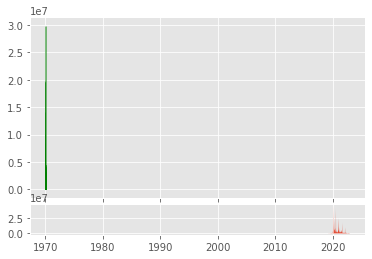

In [167]:
ax1= plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax2= plt.subplot2grid((6,1),(5,0),rowspan=1,colspan=1,sharex=ax1)
ax1.xaxis_date()
candlestick_ohlc(ax1,df.values,width=2,colorup='g')
ax2.fill_between(df_volume.index.map(mdates.date2num),df_volume.values,0)
plt.show()

In [176]:
import mpl_finance as mpf
df1= pd.read_csv('fin.csv',parse_dates=True, index_col=0)



In [177]:
df1.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-11-20 00:00:00-05:00,2.100840,2.100840,1.670668,1.670668,87465,0,0.0
2018-11-21 00:00:00-05:00,1.838735,2.434974,1.838735,2.118848,38984,0,0.0
2018-11-23 00:00:00-05:00,2.200880,2.200880,1.958784,1.960784,14994,0,0.0
2018-11-26 00:00:00-05:00,1.940776,1.940776,1.552621,1.676671,24990,0,0.0
2018-11-27 00:00:00-05:00,1.760704,1.800720,1.700680,1.792717,21991,0,0.0


In [173]:
!pip install mplfinance

C:\Users\aheed\anaconda3\lib\site-packages\mplfinance\_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


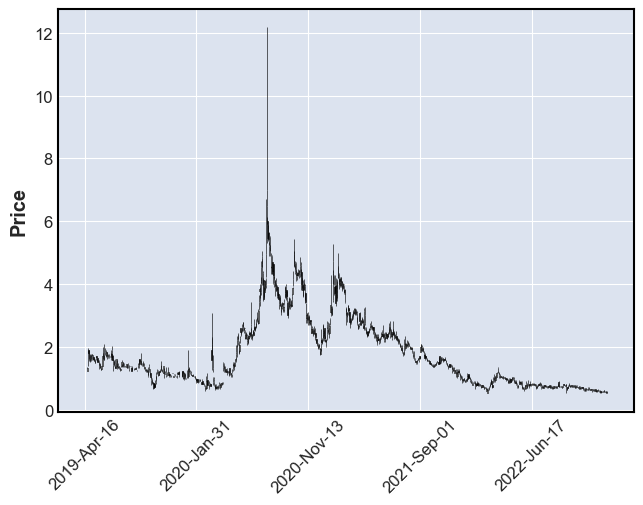

In [189]:
import mplfinance as mpf
mpf.plot(df, type='candle')

In [193]:
!pip install mpld3

In [200]:
mpld3.disable_notebook()

C:\Users\aheed\anaconda3\lib\site-packages\mplfinance\_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


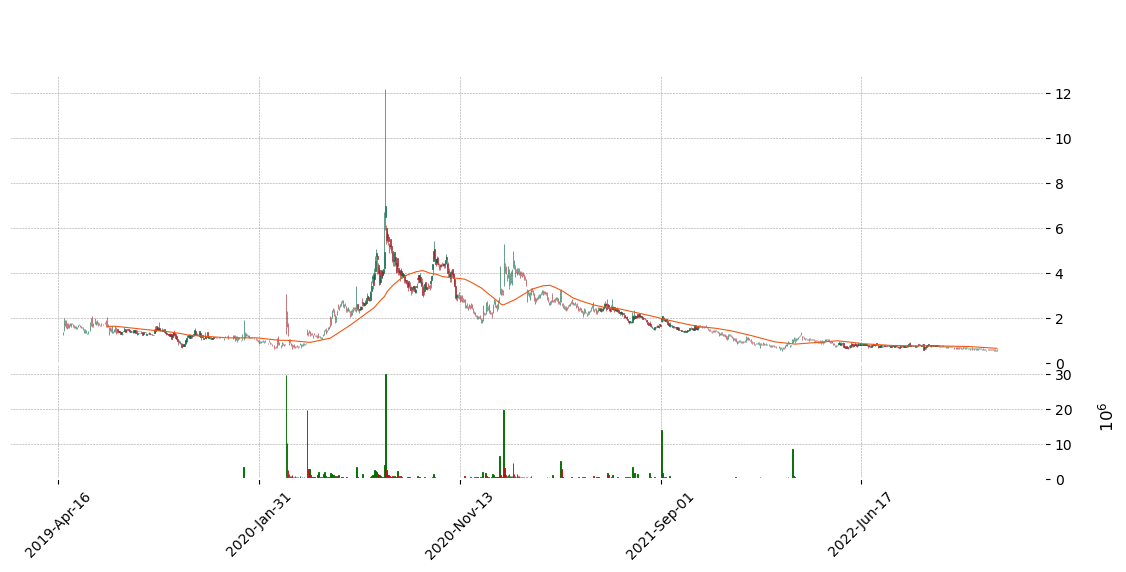

In [201]:
mpf.plot(df, type='candle', style='charles',
            title='  ',
            ylabel='  ',
            ylabel_lower='  ',
            figratio=(25,10),
            figscale=1,
            mav=50,
            volume=True
            )

C:\Users\aheed\anaconda3\lib\site-packages\mplfinance\_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


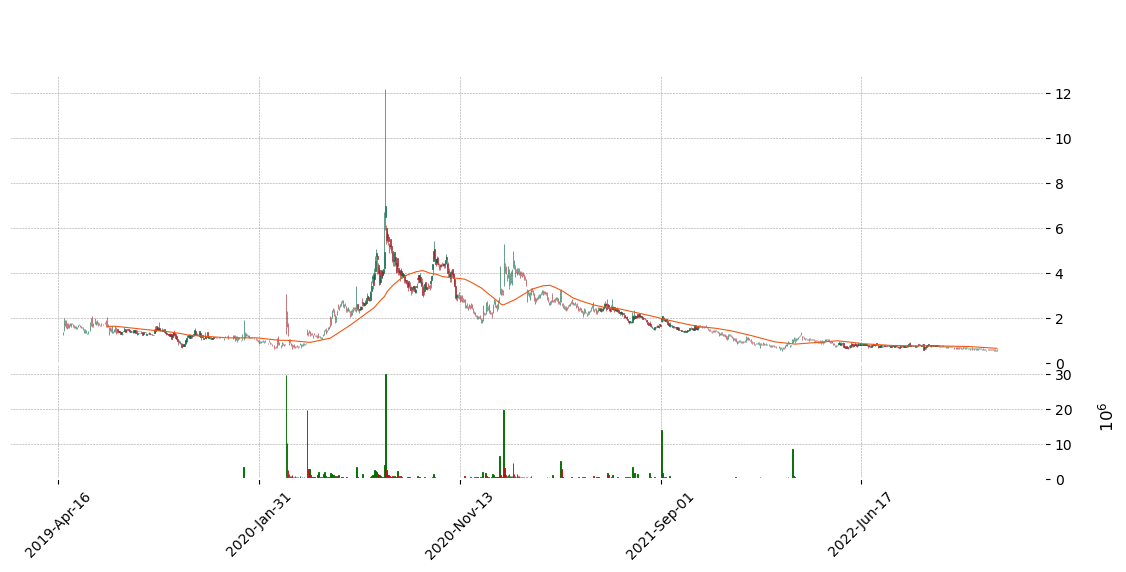

In [215]:
mpf.plot(df, type='candle', style='charles',
            title='  ',
            ylabel='  ',
            ylabel_lower='  ',
            figratio=(25,10),
            figscale=1,
            mav=50,
            volume=True
            )

In [2]:
#for importing sp500 list
import bs4 as bs 
import requests
import pickle
import lxml

In [3]:
def save_sp500_tickers():
    resp=requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup=bs.BeautifulSoup(resp.text)
    table=soup.find('table',{'class':'wikitable sortable' })
    tickers= []
    for row in table.findAll('tr')[1:]:
        ticker=row.findAll('td')[0].text
        tickers.append(ticker)
        
    with open ('sp500tickers.pickle','wb') as f:
        pickle.dump(tickers,f)
        
    print(tickers)
    return tickers

In [7]:
save_sp500_tickers()

['MMM\n', 'AOS\n', 'ABT\n', 'ABBV\n', 'ACN\n', 'ATVI\n', 'ADM\n', 'ADBE\n', 'ADP\n', 'AAP\n', 'AES\n', 'AFL\n', 'A\n', 'APD\n', 'AKAM\n', 'ALK\n', 'ALB\n', 'ARE\n', 'ALGN\n', 'ALLE\n', 'LNT\n', 'ALL\n', 'GOOGL\n', 'GOOG\n', 'MO\n', 'AMZN\n', 'AMCR\n', 'AMD\n', 'AEE\n', 'AAL\n', 'AEP\n', 'AXP\n', 'AIG\n', 'AMT\n', 'AWK\n', 'AMP\n', 'ABC\n', 'AME\n', 'AMGN\n', 'APH\n', 'ADI\n', 'ANSS\n', 'AON\n', 'APA\n', 'AAPL\n', 'AMAT\n', 'APTV\n', 'ACGL\n', 'ANET\n', 'AJG\n', 'AIZ\n', 'T\n', 'ATO\n', 'ADSK\n', 'AZO\n', 'AVB\n', 'AVY\n', 'BKR\n', 'BALL\n', 'BAC\n', 'BBWI\n', 'BAX\n', 'BDX\n', 'WRB\n', 'BRK.B\n', 'BBY\n', 'BIO\n', 'TECH\n', 'BIIB\n', 'BLK\n', 'BK\n', 'BA\n', 'BKNG\n', 'BWA\n', 'BXP\n', 'BSX\n', 'BMY\n', 'AVGO\n', 'BR\n', 'BRO\n', 'BF.B\n', 'CHRW\n', 'CDNS\n', 'CZR\n', 'CPT\n', 'CPB\n', 'COF\n', 'CAH\n', 'KMX\n', 'CCL\n', 'CARR\n', 'CTLT\n', 'CAT\n', 'CBOE\n', 'CBRE\n', 'CDW\n', 'CE\n', 'CNC\n', 'CNP\n', 'CDAY\n', 'CF\n', 'CRL\n', 'SCHW\n', 'CHTR\n', 'CVX\n', 'CMG\n', 'CB\n', 'CHD\n', '

['MMM\n',
 'AOS\n',
 'ABT\n',
 'ABBV\n',
 'ACN\n',
 'ATVI\n',
 'ADM\n',
 'ADBE\n',
 'ADP\n',
 'AAP\n',
 'AES\n',
 'AFL\n',
 'A\n',
 'APD\n',
 'AKAM\n',
 'ALK\n',
 'ALB\n',
 'ARE\n',
 'ALGN\n',
 'ALLE\n',
 'LNT\n',
 'ALL\n',
 'GOOGL\n',
 'GOOG\n',
 'MO\n',
 'AMZN\n',
 'AMCR\n',
 'AMD\n',
 'AEE\n',
 'AAL\n',
 'AEP\n',
 'AXP\n',
 'AIG\n',
 'AMT\n',
 'AWK\n',
 'AMP\n',
 'ABC\n',
 'AME\n',
 'AMGN\n',
 'APH\n',
 'ADI\n',
 'ANSS\n',
 'AON\n',
 'APA\n',
 'AAPL\n',
 'AMAT\n',
 'APTV\n',
 'ACGL\n',
 'ANET\n',
 'AJG\n',
 'AIZ\n',
 'T\n',
 'ATO\n',
 'ADSK\n',
 'AZO\n',
 'AVB\n',
 'AVY\n',
 'BKR\n',
 'BALL\n',
 'BAC\n',
 'BBWI\n',
 'BAX\n',
 'BDX\n',
 'WRB\n',
 'BRK.B\n',
 'BBY\n',
 'BIO\n',
 'TECH\n',
 'BIIB\n',
 'BLK\n',
 'BK\n',
 'BA\n',
 'BKNG\n',
 'BWA\n',
 'BXP\n',
 'BSX\n',
 'BMY\n',
 'AVGO\n',
 'BR\n',
 'BRO\n',
 'BF.B\n',
 'CHRW\n',
 'CDNS\n',
 'CZR\n',
 'CPT\n',
 'CPB\n',
 'COF\n',
 'CAH\n',
 'KMX\n',
 'CCL\n',
 'CARR\n',
 'CTLT\n',
 'CAT\n',
 'CBOE\n',
 'CBRE\n',
 'CDW\n',
 'CE\n',
 'CNC

In [4]:
import bs4 as bs 
import requests
import pickle
import datetime as dt
import os
import pandas as pd
import pandas_datareader.data as web
import lxml
import yfinance as yf

In [6]:
def get_data_from_yahoo(reload_sp500= True):

    if reload_sp500:
        tickers=save_sp500_tickers()
    else:
        
        with open ('sp500tickers.pickle','rb')as f:
                tickers=pickle.load(f)
                
    if not os.path.exists('stock_dfs'):

          os.makedirs('stock_dfs')
    start=dt.datetime(2018,4,16)
    end=dt.datetime(2020,4,16)

    for ticker in tickers[:10]:
        print(ticker)
        # Yahoo finance uses "-" instead of "."
        ticker = ticker.replace('.', '-')
        if not os.path.exists(f'stock_dfs/{ticker}.csv'):
            try:
                df = web.DataReader(ticker, 'yahoo', start,end)
            except Exception as e:
                print(f'Could not get data for {ticker}')
                continue
            df.to_csv(f'stock_dfs/{ticker}.csv')
        else:
            print(f'Already have {ticker}')
get_data_from_yahoo()



['MMM\n', 'AOS\n', 'ABT\n', 'ABBV\n', 'ACN\n', 'ATVI\n', 'ADM\n', 'ADBE\n', 'ADP\n', 'AAP\n', 'AES\n', 'AFL\n', 'A\n', 'APD\n', 'AKAM\n', 'ALK\n', 'ALB\n', 'ARE\n', 'ALGN\n', 'ALLE\n', 'LNT\n', 'ALL\n', 'GOOGL\n', 'GOOG\n', 'MO\n', 'AMZN\n', 'AMCR\n', 'AMD\n', 'AEE\n', 'AAL\n', 'AEP\n', 'AXP\n', 'AIG\n', 'AMT\n', 'AWK\n', 'AMP\n', 'ABC\n', 'AME\n', 'AMGN\n', 'APH\n', 'ADI\n', 'ANSS\n', 'AON\n', 'APA\n', 'AAPL\n', 'AMAT\n', 'APTV\n', 'ACGL\n', 'ANET\n', 'AJG\n', 'AIZ\n', 'T\n', 'ATO\n', 'ADSK\n', 'AZO\n', 'AVB\n', 'AVY\n', 'BKR\n', 'BALL\n', 'BAC\n', 'BBWI\n', 'BAX\n', 'BDX\n', 'WRB\n', 'BRK.B\n', 'BBY\n', 'BIO\n', 'TECH\n', 'BIIB\n', 'BLK\n', 'BK\n', 'BA\n', 'BKNG\n', 'BWA\n', 'BXP\n', 'BSX\n', 'BMY\n', 'AVGO\n', 'BR\n', 'BRO\n', 'BF.B\n', 'CHRW\n', 'CDNS\n', 'CZR\n', 'CPT\n', 'CPB\n', 'COF\n', 'CAH\n', 'KMX\n', 'CCL\n', 'CARR\n', 'CTLT\n', 'CAT\n', 'CBOE\n', 'CBRE\n', 'CDW\n', 'CE\n', 'CNC\n', 'CNP\n', 'CDAY\n', 'CF\n', 'CRL\n', 'SCHW\n', 'CHTR\n', 'CVX\n', 'CMG\n', 'CB\n', 'CHD\n', '

In [ ]:
def data_from_yahoo(reload_sp500= True):

    if reload_sp500:
        tickers=save_sp500_tickers()
    else:
        
        with open ('sp500tickers.pickle','rb')as f:
                tickers=pickle.load(f)
                
    if not os.path.exists('stock_dfs'):
        os.makedirs('stocks_dfs')
    for ticker in tickers[:5]:
        yf.download(tickers)
        
    else:
        print('Already have ticker')
        
data_from_yahoo()
        

['MMM\n', 'AOS\n', 'ABT\n', 'ABBV\n', 'ACN\n', 'ATVI\n', 'ADM\n', 'ADBE\n', 'ADP\n', 'AAP\n', 'AES\n', 'AFL\n', 'A\n', 'APD\n', 'AKAM\n', 'ALK\n', 'ALB\n', 'ARE\n', 'ALGN\n', 'ALLE\n', 'LNT\n', 'ALL\n', 'GOOGL\n', 'GOOG\n', 'MO\n', 'AMZN\n', 'AMCR\n', 'AMD\n', 'AEE\n', 'AAL\n', 'AEP\n', 'AXP\n', 'AIG\n', 'AMT\n', 'AWK\n', 'AMP\n', 'ABC\n', 'AME\n', 'AMGN\n', 'APH\n', 'ADI\n', 'ANSS\n', 'AON\n', 'APA\n', 'AAPL\n', 'AMAT\n', 'APTV\n', 'ACGL\n', 'ANET\n', 'AJG\n', 'AIZ\n', 'T\n', 'ATO\n', 'ADSK\n', 'AZO\n', 'AVB\n', 'AVY\n', 'BKR\n', 'BALL\n', 'BAC\n', 'BBWI\n', 'BAX\n', 'BDX\n', 'WRB\n', 'BRK.B\n', 'BBY\n', 'BIO\n', 'TECH\n', 'BIIB\n', 'BLK\n', 'BK\n', 'BA\n', 'BKNG\n', 'BWA\n', 'BXP\n', 'BSX\n', 'BMY\n', 'AVGO\n', 'BR\n', 'BRO\n', 'BF.B\n', 'CHRW\n', 'CDNS\n', 'CZR\n', 'CPT\n', 'CPB\n', 'COF\n', 'CAH\n', 'KMX\n', 'CCL\n', 'CARR\n', 'CTLT\n', 'CAT\n', 'CBOE\n', 'CBRE\n', 'CDW\n', 'CE\n', 'CNC\n', 'CNP\n', 'CDAY\n', 'CF\n', 'CRL\n', 'SCHW\n', 'CHTR\n', 'CVX\n', 'CMG\n', 'CB\n', 'CHD\n', '

[                       1%                       ]  6 of 503 completed